In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier


In [2]:
# Try reading the CSV file with a different encoding
df = pd.read_csv('Speed Dating Data.csv', delimiter=',', encoding='MacRoman')

# Display the first few rows of the DataFrame
df.head()


,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Columns: 195 entries, iid to amb5_3
dtypes: float64(174), int64(13), object(8)
memory usage: 12.5+ MB


In [4]:
df.shape

(8378, 195)

In [5]:
df['iid'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131,
       132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144,
       145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157,
       158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170,
       171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 18

In [6]:
df['iid'].nunique()

551

In [7]:
df['gender'] = df.gender.map({1 : 'Male', 0 : 'Female'}).fillna(df.gender)
df['gender'] = df.gender.map({1 : 'Male', 0 : 'Female'}).fillna(df.gender)
df.gender.value_counts(dropna=False)

Male      4194
Female    4184
Name: gender, dtype: int64

In [8]:
df[['gender', 'age']].groupby('gender').agg(['mean', 'median', 'min', 'max', 'count'])


age                         
             mean median   min   max count
gender                                    
Female  26.105851   26.0  19.0  55.0  4119
Male    26.609270   27.0  18.0  42.0  4164

In [9]:
df[['race','gender', 'age']].groupby(['race', 'gender'])\
.agg(['mean', 'median', 'min', 'max', 'count'])

age                         
                  mean median   min   max count
race gender                                    
1.0  Female  26.962656   26.0  20.0  36.0   241
     Male    26.670391   27.0  23.0  30.0   179
2.0  Female  25.965217   25.0  21.0  38.0  2185
     Male    26.875299   27.0  21.0  42.0  2510
3.0  Female  26.875931   26.0  19.0  35.0   403
     Male    27.022989   28.0  22.0  32.0   261
4.0  Female  26.087081   26.0  21.0  55.0  1045
     Male    25.710779   26.0  18.0  37.0   937
6.0  Female  25.330612   25.0  20.0  30.0   245
     Male    26.808664   26.0  22.0  33.0   277

In [10]:
df['field'].value_counts()[:10]

Business                  521
MBA                       468
Law                       462
Social Work               378
International Affairs     252
Electrical Engineering    164
Psychology                139
law                       123
Finance                   113
business                  110
Name: field, dtype: int64

In [11]:
mask=df['field'].value_counts()[:10].keys()

In [12]:
for i, column_name in enumerate(mask):
    globals()[f'mask{i}'] = df['field'] == column_name


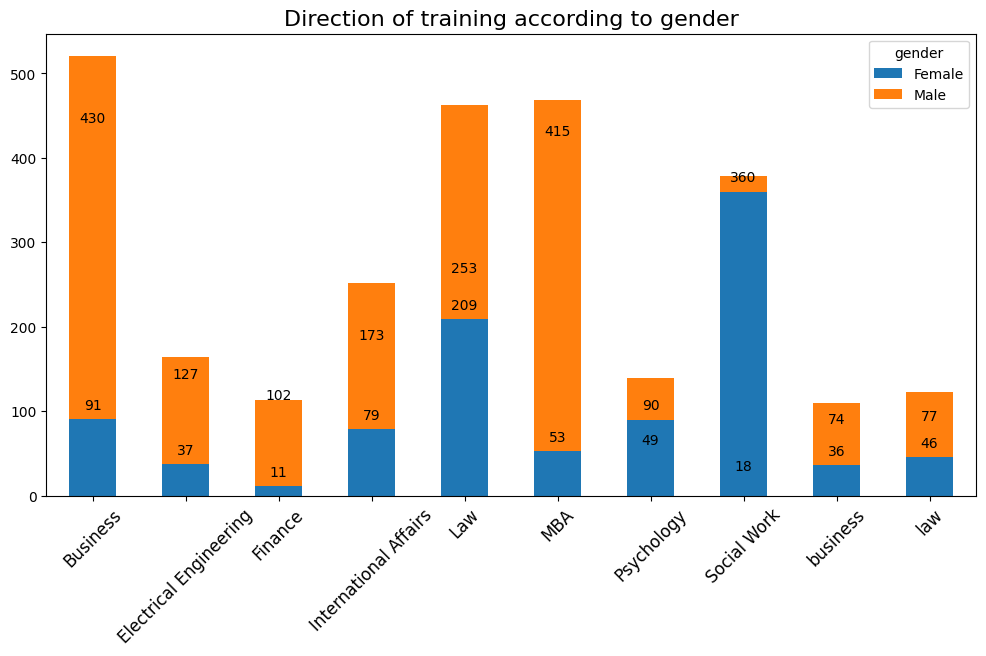

In [13]:

# Assuming 'df' is your original DataFrame
mask = df['field'].value_counts()[:10].index
df_filtered = df[df['field'].isin(mask)]

# Create a grouped bar plot
df1 = df_filtered[['gender', 'field']].groupby(['field', 'gender']).size().unstack().fillna(0)
ax = df1.plot(kind='bar', figsize=(12, 6), stacked=True)

# Add count annotations on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

# Customize the plot
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12, rotation=45)
ax.set_title('Direction of training according to gender', fontsize=16)
ax.set_xlabel('', fontsize=1)

plt.show()


The vast majority study business, finance, economics, natural sciences (chemistry, physics). Men prevail in all fields of study.

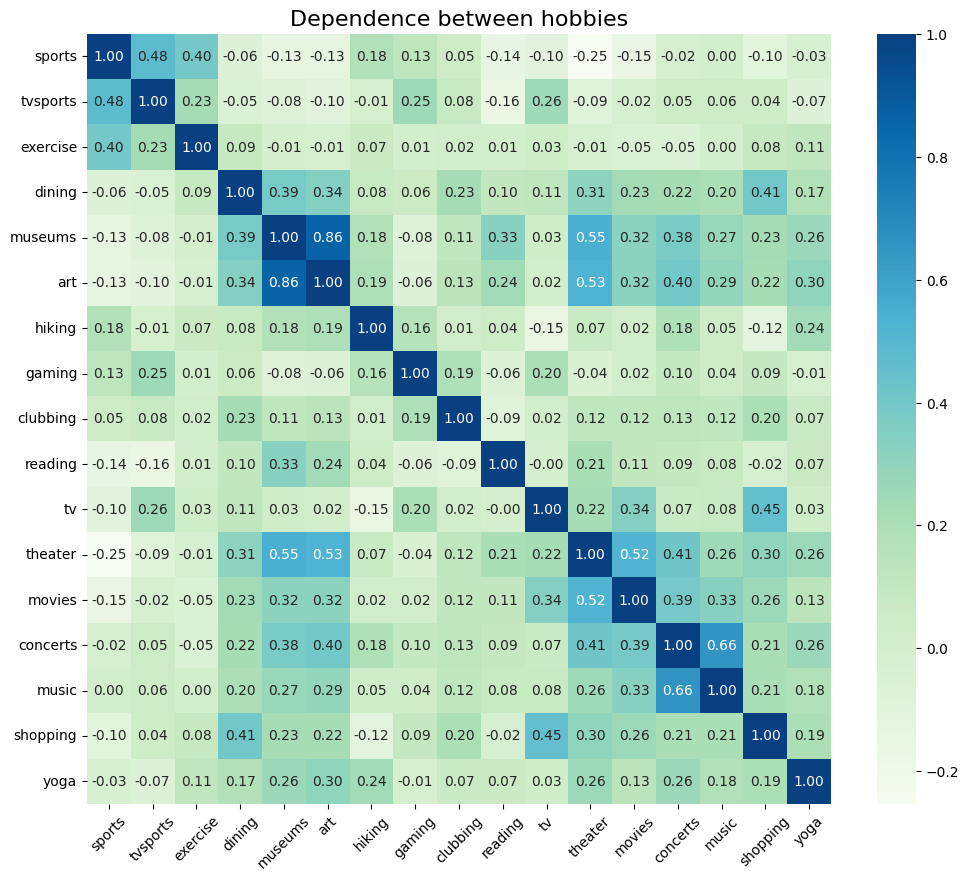

In [14]:
# Assuming 'df' is your original DataFrame
corr = df[['sports', 'tvsports', 'exercise', 'dining', 'museums',
           'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater',
           'movies', 'concerts', 'music', 'shopping', 'yoga']].corr()

plt.figure(figsize=(12, 10))
ax = sns.heatmap(corr, cmap='GnBu', annot=True, fmt=".2f", annot_kws={"size": 10})
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_title('Dependence between hobbies', fontsize=16)

plt.show()


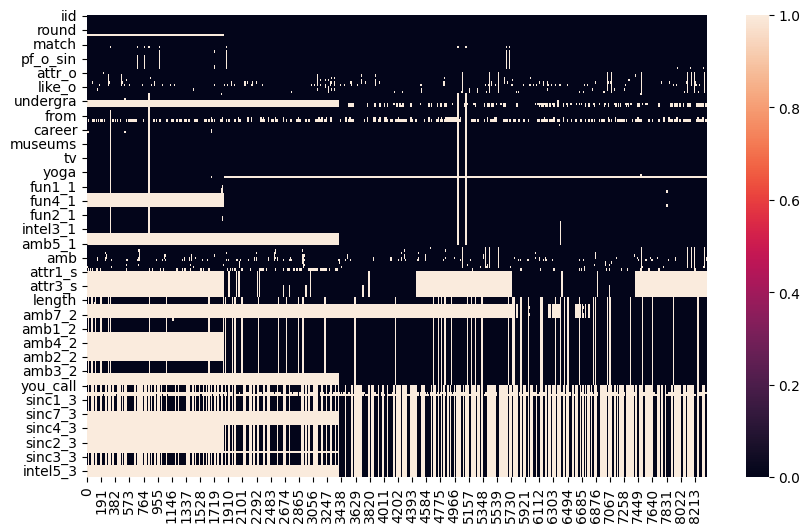

In [15]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isna().transpose());


In [17]:
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer

num_cols =df.select_dtypes(include=np.number).columns
cat_cols = df.columns[df.dtypes == 'object']

def filling_missing_values(data):
  num_cols =data.select_dtypes(include=np.number).columns
  cat_cols = data.columns[data.dtypes == 'object']
  print(print("size_of_num_and_cat_cols" ), len(num_cols),len(cat_cols))
  percent_missing = data.isnull().sum() * 100 / len(data)
  missing_value_df = pd.DataFrame({'column_name': data.columns,
                                 'percent_missing': percent_missing})
  #print("cat_cols_missing_percentage")
  #display(missing_value_df.loc[cat_cols].sort_values(ascending=False,by="percent_missing")[:10])

  miss_cat=missing_value_df.loc[cat_cols][percent_missing!=0]
  miss_num=missing_value_df.loc[num_cols][percent_missing!=0]
  print("filling_columns_cat")
  display(miss_cat)
  print("filling_columns_num")
  display(miss_num)
  #strategy_for_categorial_feature
  imputer = SimpleImputer(strategy='most_frequent',missing_values=np.nan)
  data[miss_cat.index]=imputer.fit_transform(data[miss_cat.index])
  #strategy_for_numerical_feature
  imputer=KNNImputer(n_neighbors=5)
  data[miss_num.index]=imputer.fit_transform(data[miss_num.index])
  return data

In [18]:
filling_missing_values(df)

size_of_num_and_cat_cols
None 186 9
filling_columns_cat


<ipython-input-17-751f5ab96c9e>:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  miss_cat=missing_value_df.loc[cat_cols][percent_missing!=0]
<ipython-input-17-751f5ab96c9e>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  miss_num=missing_value_df.loc[num_cols][percent_missing!=0]


,column_name,percent_missing
field,field,0.751969
undergra,undergra,41.346383
mn_sat,mn_sat,62.604440
tuition,tuition,57.233230
from,from,0.942946
zipcode,zipcode,12.699928
income,income,48.925758
career,career,1.062306


filling_columns_num


,column_name,percent_missing
id,id,0.011936
positin1,positin1,22.033898
pid,pid,0.119360
int_corr,int_corr,1.885892
age_o,age_o,1.241346
...,...,...
attr5_3,attr5_3,75.936978
sinc5_3,sinc5_3,75.936978
intel5_3,intel5_3,75.936978
fun5_3,fun5_3,75.936978


,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,Female,1,1,1,10,7,4.2,4,...,5.0,7.0,7.0,7.0,7.0,6.6,7.4,8.0,7.6,6.6
1,1,1.0,Female,1,1,1,10,7,4.2,3,...,5.0,7.0,7.0,7.0,7.0,6.6,7.4,8.0,7.6,6.6
2,1,1.0,Female,1,1,1,10,7,4.4,10,...,5.0,7.0,7.0,7.0,7.0,6.6,7.4,8.0,7.6,6.6
3,1,1.0,Female,1,1,1,10,7,4.2,5,...,5.0,7.0,7.0,7.0,7.0,6.4,7.0,7.4,7.6,5.8
4,1,1.0,Female,1,1,1,10,7,4.4,7,...,5.0,7.0,7.0,7.0,7.0,6.6,7.4,8.0,7.6,6.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8373,552,22.0,Male,44,2,21,22,14,10.0,5,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0
8374,552,22.0,Male,44,2,21,22,13,10.0,4,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0
8375,552,22.0,Male,44,2,21,22,19,10.0,10,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0
8376,552,22.0,Male,44,2,21,22,3,10.0,16,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0


In [19]:
from sklearn.model_selection import train_test_split

def split(X,y):
  X_train, X_val, y_train, y_val = train_test_split(X,y,
                                                    test_size=0.2, random_state=42)

  print('Training Features Shape:', X_train.shape)
  print('Training Labels Shape:', y_train.shape)
  print('Testing Features Shape:', X_val.shape)
  print('Testing Labels Shape:', y_val.shape)
  return X_train,X_val,y_train,y_val

In [20]:
X = df.drop('match', axis=1)
y = df["match"]

X_train,X_val,y_train,y_val=split(X,y)

num_cols =X.select_dtypes(include=np.number).columns
cat_cols = X.columns[X.dtypes == 'object']

print(f"We have {len(num_cols)} numeric columns: {', '.join(num_cols)}")
print(f"And {len(cat_cols)} categorical columns: {', '.join(cat_cols)}")

Training Features Shape: (6702, 194)
Training Labels Shape: (6702,)
Testing Features Shape: (1676, 194)
Testing Labels Shape: (1676,)
We have 185 numeric columns: iid, id, idg, condtn, wave, round, position, positin1, order, partner, pid, int_corr, samerace, age_o, race_o, pf_o_att, pf_o_sin, pf_o_int, pf_o_fun, pf_o_amb, pf_o_sha, dec_o, attr_o, sinc_o, intel_o, fun_o, amb_o, shar_o, like_o, prob_o, met_o, age, field_cd, race, imprace, imprelig, goal, date, go_out, career_c, sports, tvsports, exercise, dining, museums, art, hiking, gaming, clubbing, reading, tv, theater, movies, concerts, music, shopping, yoga, exphappy, expnum, attr1_1, sinc1_1, intel1_1, fun1_1, amb1_1, shar1_1, attr4_1, sinc4_1, intel4_1, fun4_1, amb4_1, shar4_1, attr2_1, sinc2_1, intel2_1, fun2_1, amb2_1, shar2_1, attr3_1, sinc3_1, fun3_1, intel3_1, amb3_1, attr5_1, sinc5_1, intel5_1, fun5_1, amb5_1, dec, attr, sinc, intel, fun, amb, shar, like, prob, met, match_es, attr1_s, sinc1_s, intel1_s, fun1_s, amb1_s, shar

In [21]:

from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder

cat_pipe_ordinal = Pipeline([
    ('encoder', OrdinalEncoder( ))
])

numerical_pipe = Pipeline([
    ('scaler', StandardScaler())
])

preprocessors_ = ColumnTransformer(transformers=[
    ('num', numerical_pipe, num_cols),
    ('cat', cat_pipe_ordinal, cat_cols)
])

pipeline = Pipeline([
    ('preprocessors', preprocessors_)
])

In [22]:
X_train = pipeline.fit_transform(X_train)
X_test  = pipeline.transform(X_val)

In [23]:

from sklearn.model_selection import train_test_split, KFold, cross_val_score


# Define the number of splits for k-fold cross-validation
kfold = KFold(n_splits=4, shuffle=True, random_state=42)

# Logistic Regression
clf = LogisticRegression(random_state=42)
cv_res_lr = cross_val_score(clf, X_train, y_train, cv=kfold, scoring="accuracy")

# Random Forest
cdt = RandomForestClassifier(n_estimators=7)
cv_res_dt = cross_val_score(cdt, X_train, y_train, cv=kfold, scoring="accuracy")

# Gradient Boosting
cgb = GradientBoostingClassifier()
cv_res_gb = cross_val_score(cgb, X_train, y_train, cv=kfold, scoring="accuracy")

# Create a DataFrame to display the results
res = pd.DataFrame({
    "Model": ["LogisticRegression", "GradientBoosting", "RandomForest"],
    "Accuracy": [cv_res_lr.mean(), cv_res_gb.mean(), cv_res_dt.mean()]
})

print(res)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

                Model  Accuracy
0  LogisticRegression  0.984929
1    GradientBoosting  1.000000
2        RandomForest  0.941213


In [24]:
from sklearn.metrics import accuracy_score
logreg = LogisticRegression(random_state = 42, max_iter = 1200)
logreg.fit(X_train, y_train)
predict = logreg.predict(X_test)
print('Accuracy:', accuracy_score(y_val, predict))

Accuracy: 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
